# Flare Masking Tutorial

Lightcurves contain edges. Whether from the beginning or end of a sector, orbit break, or break from PDCSAP reduction lightcurves lightcuvres in TESS are not continuous. A consequence is that detrending often leaves artifacts at the edges that resemble flares. So cutting out the edges leaves the detection resistant against a dominant source of false-positives.

However there are some free parameters to consider within this task. Should we cut out all breaks? Even ones where we're just missing one cadence? (no) How many cadences should we cut on either side?

The answers to these question will differ person to person so TOFFEE leaves it flexible to determine whether or not you want to chop off the edges, the minimum length of a break to be considered for masking, and how many cadences should be masked on either side of a break.

Here we'll see the two functions responsible for recognizing and masking breaks: break_finder and light_curve_mask.

In [6]:
import toffee
import numpy as np
import matplotlib.pyplot as plt

#  Break finder

Let's make a synthetic lightcurve with three breaks of different sizes. We'll see how break_finder and light_curve_mask work to get rid of points on either side of various breaks.

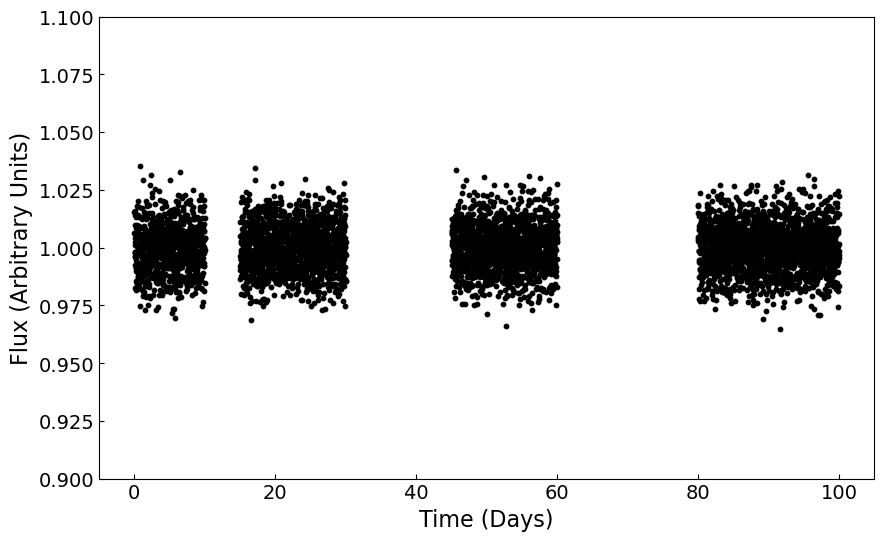

In [9]:
#create flat lightcurve with various breaks
time = np.linspace(0, 100, 10001) #time across entire sector 1 times

flux = np.full(10001, 1) + np.random.normal(0, 0.01, 10001) #add flux with some noise

#Add a break 500 cadences wide, 5 days
break_mask_25 = ((time > time[1000]) & (time < time[1501])) == False

#Add a break 1500 cadences wide, 15 days
break_mask_100 = ((time > time[3000]) & (time < time[4501])) == False

#Add a break 2000 cadences wide, 20 days
break_mask_250 = ((time > time[6000]) & (time < time[8001])) == False

#Add breaks masks to lightcurve
time = time[break_mask_25 & break_mask_100 & break_mask_250]
flux = flux[break_mask_25 & break_mask_100 & break_mask_250]

plt.figure(figsize = (10, 6))
plt.scatter(time, flux, s = 10, color = 'black')
plt.xlabel('Time (Days)', fontsize = 16)
plt.ylabel('Flux (Arbitrary Units)', fontsize = 16)
plt.ylim(0.9, 1.1)
plt.tick_params(direction = 'in', labelsize = 14)

## Now we'll run break_finder and show where the breaks are and how long they are

break_finder takes the time and flux from the lightcurve and returns a pandas dataframe containing information about breaks that are sufficiently long as dictated by the min_break argument.

In [15]:
sector_breaks = toffee.break_finder(time, flux, min_break = 20)

sector_breaks

,Break_Index,Break_Start_Time,Break_End_Time
0,4000,60.0,80.01


### Now run through sector_break_mask

sector_break_mask returns a boolean array for masking time, flux, flux_err, and quality on either side of breaks. The number of points covered by the masking is determined by the clip_breaks argument. Keep in mind it's number of POINTS not TIME.

In [21]:
sector_break_mask = toffee.light_curve_mask(time, flux, min_break = 20, clip_breaks = 100)

print(sector_break_mask)

[False False False ... False False False]


It's just a boolean array

# Plot lightcurve with breaks

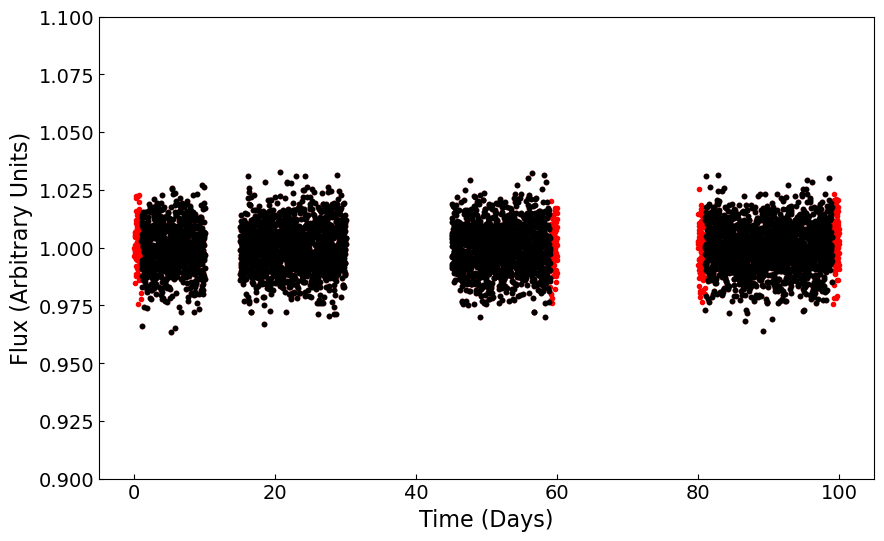

In [7]:
#Run through break detector to only find break of 2000 cadences
sector_break_mask = toffee.light_curve_mask(time, flux, min_break = 20, clip_breaks = 100)

#plot
plt.figure(figsize = (10, 6))
plt.scatter(time, flux, s = 9, color = 'red')
plt.scatter(time[sector_break_mask], flux[sector_break_mask], s = 10, color = 'black')
plt.xlabel('Time (Days)', fontsize = 16)
plt.ylabel('Flux (Arbitrary Units)', fontsize = 16)
plt.ylim(0.9, 1.1)
plt.tick_params(direction = 'in', labelsize = 14)

### Change the number of cadences to mask on either side

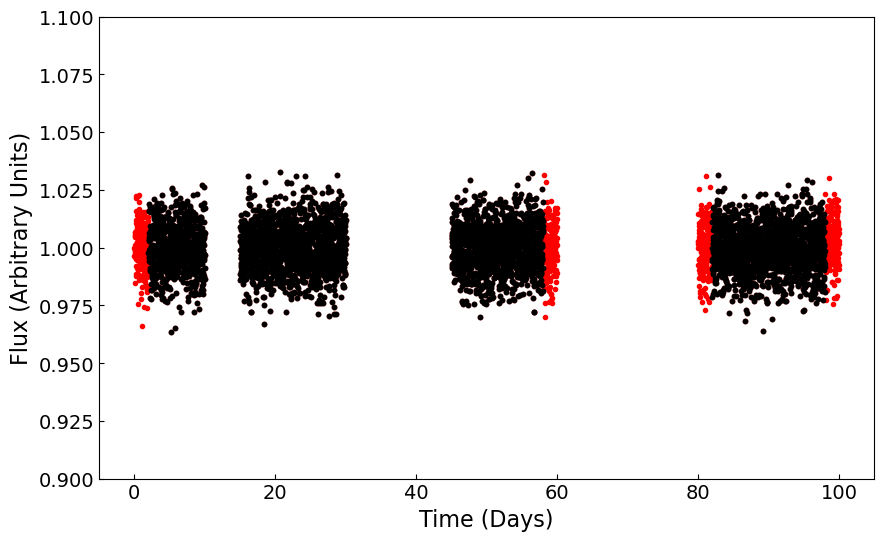

In [9]:
#Run through break detector to only find break of 2000 cadences
sector_break_mask = toffee.light_curve_mask(time, flux, min_break = 20, clip_breaks = 200)

#plot
plt.figure(figsize = (10, 6))
plt.scatter(time, flux, s = 9, color = 'red')
plt.scatter(time[sector_break_mask], flux[sector_break_mask], s = 10, color = 'black')
plt.xlabel('Time (Days)', fontsize = 16)
plt.ylabel('Flux (Arbitrary Units)', fontsize = 16)
plt.ylim(0.9, 1.1)
plt.tick_params(direction = 'in', labelsize = 14)

## Find all but the smallest break

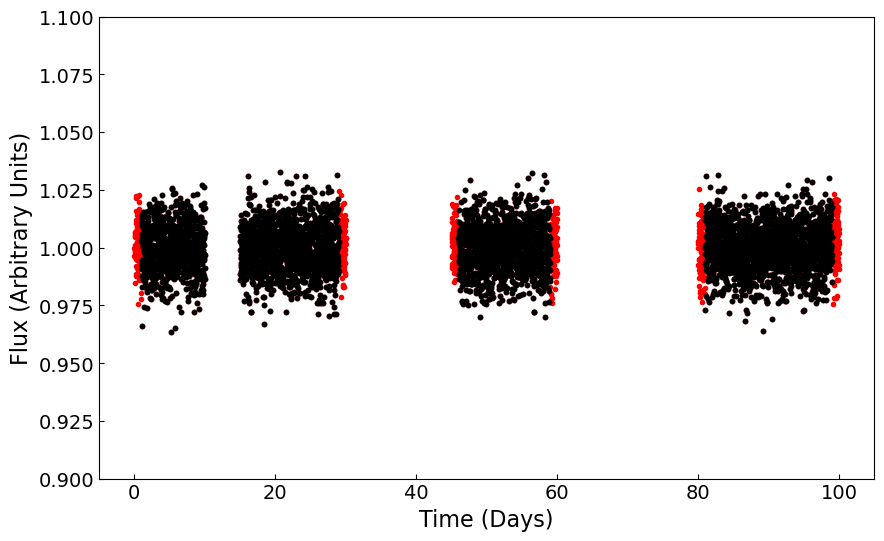

In [11]:
#Run through break detector to find breaks of 2000 cadences and 1500 cadences
sector_break_mask = toffee.light_curve_mask(time, flux, min_break = 15, clip_breaks = 100)


#plot
plt.figure(figsize = (10, 6))
plt.scatter(time, flux, s = 9, color = 'red')
plt.scatter(time[sector_break_mask], flux[sector_break_mask], s = 10, color = 'black')
plt.xlabel('Time (Days)', fontsize = 16)
plt.ylabel('Flux (Arbitrary Units)', fontsize = 16)
plt.ylim(0.9, 1.1)
plt.tick_params(direction = 'in', labelsize = 14)

# Find all breaks

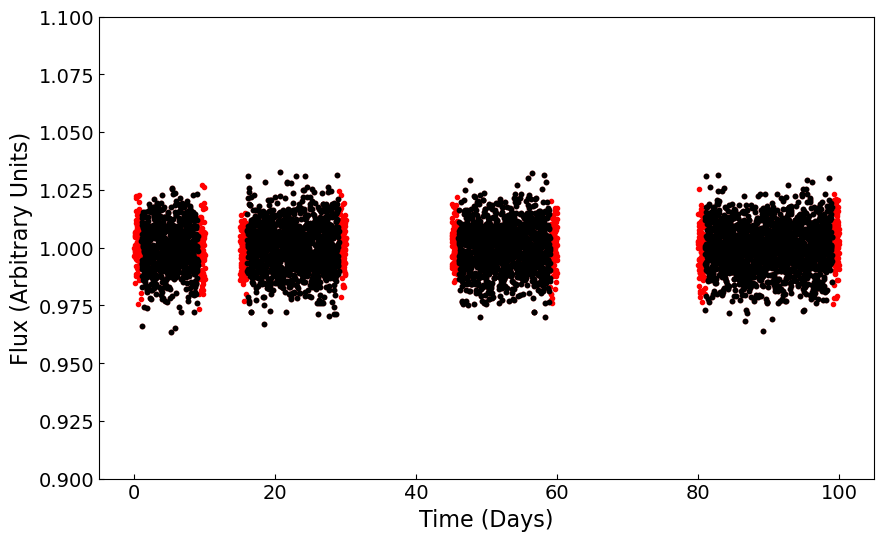

In [13]:
#Run through break detector to find all breaks
sector_break_mask = toffee.light_curve_mask(time, flux, min_break = 5, clip_breaks = 100)

#plot
plt.figure(figsize = (10, 6))
plt.scatter(time, flux, s = 9, color = 'red')
plt.scatter(time[sector_break_mask], flux[sector_break_mask], s = 10, color = 'black')
plt.xlabel('Time (Days)', fontsize = 16)
plt.ylabel('Flux (Arbitrary Units)', fontsize = 16)
plt.ylim(0.9, 1.1)
plt.tick_params(direction = 'in', labelsize = 14)

And now you're all set! The default settings for the masking are pretty aggressive for the purposes of the paper it was originally written for so I would advise loosening the min_break argument to something larger than 0.25 days to 1 days.